# **Ejercicio 1**

## **Ejercicio Notas de Clase**
Considere los ejemplos vistos en clase, en los que se analizó la implementación de los modelos: *k-nn*, *regresión lineal*, *regresión logística*. Realice hiperparametrización y validación cruzada usando *(i) GridSearchCV y Pipeline vs (ii) Manualmente, sin usar GridSearchCV y Pipeline (Use ciclos FOR, WHILE, etc,...)*. Verifique que los scores obtenidos en los ítems *(i)-(ii)* son los mismos. Los ejercicios son los siguientes:

-  Breast Cancer: (KNN, LogisticRegression) Decida cual es la métrica de mayor importancia en la aplicación de detección de cancer (métrica de negocio). Utilice esta métrica para la evaluación y selección del modelo y justifique su respuesta. Los resultados deben ser presentados usando el Cuadro 1. El estudiante que obtenga el mejor score con esta métrica, será premiado con una décima para el corte. Los datos deben ser cargados mediante el siguiente par de líneas:

        • from sklearn.datasets import load_breast_cancer
        • cancer = load_breast_cancer()

- Boston Housing: (LinearRegression, KNN). Utilice la métrica R2 y RMSE durante la evaluación y selección del modelo. Los resultados deben ser presentados usando el Cuadro 2. Realice un gráfico en el que muestre en los conjuntos de entrenamiento y test, el precio original y el predicho. El estudiante que obtenga el mejor score con esta métrica, será premiado con una décima para el corte. Los datos deben ser cargados mediante el siguiente par de líneas:

        • import mglearn
        • X, y = mglearn.datasets.load_extended_boston())

**Cuadro 1: Modelo de clasificación para detección de fraude**

| **Modelo**            | **precision** | **recall** | **f1-score** | **AUC** |
|-----------------------|---------------|------------|--------------|---------|
| K-NN                  | ...        | ...          | ...           | ...       |
| Logistic Regression   | ...           | ...          | ...            | ...       |






**Cuadro 2: Modelo de regresión para velocidad del viento**

| **Modelo**            | **MAPE** | **MAE** | **RMSE** | **MSE** | **R2** |
|-----------------------|----------|---------|----------|---------|--------|
| K-NN                  | ...      | ...      | ...       | ...      | ...     |
| Linear Regression     | ...      | ...      | ...       | ...      | ...     |





## **Librerías y módulos necesarios**

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import warnings
import mglearn
import pandas as pd
warnings.filterwarnings("ignore")


## **Breast Cancer**

En este caso, contamos con un conjunto de datos sobre el cáncer de mama (`Breast Cancer`). Nótese que al tratarse de un tema de salud crítico, es de vital importancia escoger la métrica más acertada para asegurarnos de dar las mejores estimaciones. Es por ello, que en este caso, decidimos trabajar con *`Recall`*. Esta métrica nos permitirá limitar los falsos negativos, es decir, aquellas observaciones que en realidad SI tienen cáncer pero fueron predichas como que NO tienen. 



Inicialmente se hace el cargue del conjunto de datos. 

In [48]:
data_cancer = load_breast_cancer() # Datos
X =  data_cancer.data # Características
y = data_cancer.target # Etiquetas

### **Método GridSearchCV**


A continuación se muestra la implementación del método `GridSearchCV()` utilizando pipelines, junto con la hiperparametrización correspondiente según el modelo que se desee evaluar. En este caso, se considerarán dos modelos: `KNeighborsClassifier()` y `LogisticRegression()`.

#### **GridSearchCV K-NN**

Inicialmente, se realiza la partición del conjunto de datos utilizando el método `train_test_split()`, configurando el parámetro `stratify` igual al conjunto de etiquetas (`stratify = y`). Esto garantiza que la proporción de clases se mantenga consistente tanto en el conjunto de entrenamiento como en el de prueba, asegurando una distribución equilibrada de las etiquetas en ambas divisiones. Además se fija un `random_state = 11`


In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state = 11) 

A continuación, se procede a la construcción del pipeline, donde se especifica que primero se debe realizar el escalamiento de los datos mediante el método `MinMaxScaler()` y, posteriormente, ajustar el modelo de clasificación, que en este caso es `KNeighborsClassifier()`. Se utiliza un `param_grid_knn` para definir los hiperparámetros a evaluar, donde se especifica el número de vecinos del modelo y el peso que toma cada uno de ellos. Seguido a ello, se construye el esquema de validación cruzada mediante el método `StratifiedKFold()`. Finalmente, se aplica el método `GridSearchCV()` con cada uno de los argumentos correspondientes y tomando en cuenta la métrica más adecuada para este ejemplo, que en este caso es el `recall`.


In [50]:
# Preprocesamiento: Escalación
# Clasificación: Modelo

pipeline_knn = Pipeline([('scaler', MinMaxScaler()), ('clasificador', KNeighborsClassifier())]) 

param_grid_knn = [{ 'clasificador__n_neighbors': range(2 , 12), # Número de vecinos del modelo
                   'clasificador__weights': ['uniform', 'distance']}] 

kf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 11)

grid_met = GridSearchCV(pipeline_knn, param_grid_knn, cv = kf, scoring = 'recall')

Ahora, se entrena el modelo y se imprimen los resultados

In [51]:
grid_met.fit(X_train, y_train)
print("Mejores parámetros:", grid_met.best_params_)
print("Mejor Recall en conjunto de entrenamiento: ",grid_met.best_score_)
y_pred = grid_met.predict(X_test)
recall = recall_score(y_test, y_pred)
print('Mejor Recall en conjunto de test:', recall)

Mejores parámetros: {'clasificador__n_neighbors': 11, 'clasificador__weights': 'uniform'}
Mejor Recall en conjunto de entrenamiento:  0.992522711390636
Mejor Recall en conjunto de test: 1.0


Los resultados muestran que el modelo K-NN, con $11$ vecinos y peso uniforme (sin priorizar la cercanía de los vecinos), logró un `recall` de $0,99$ en el conjunto de entrenamiento y de $1$ en el de prueba. Esto indica que el modelo clasifica correctamente casi todas las muestras positivas, obteniendo un buen ajuste tanto en entrenamiento como en prueba, sin indicios de sobreajuste.


#### **GridSearchCV Regresión logística**

En esta parte, procedemos de forma similar al método anterior, con la diferencia de que en este caso los hiperparámetros corresponden a diferentes valores que toma el parámetro `C`, necesarios para aplicar la `LogisticRegression()`.

In [52]:
# MinMaxScaler: para normalizar nuestros datos entre 0 y 1

pipeline_rl = Pipeline([ ('scaler', MinMaxScaler()), ('clasificador', LogisticRegression())])

param_grid_lr = {'clasificador__C': [0.01, 0.1, 1, 10, 100, 1000]}

kf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 11)

grid_rl = GridSearchCV(pipeline_rl, param_grid_lr, cv = kf, scoring = 'recall')

grid_rl.fit(X_train, y_train)
print("Mejor parámetro:", grid_rl.best_params_)
print("Mejor Recall en conjunto de entrenamiento:", grid_rl.best_score_)
y_pred_lr = grid_rl.predict(X_test)
recall_lr = recall_score(y_test, y_pred_lr)
print('Mejor Recall en conjunto de test:', recall_lr)


Mejor parámetro: {'clasificador__C': 0.01}
Mejor Recall en conjunto de entrenamiento: 1.0
Mejor Recall en conjunto de test: 1.0


El modelo de regresión logística con el parámetro `C = 0.01` alcanzó un `recall` perfecto $(1.0)$ tanto en el conjunto de entrenamiento como en el de prueba.
Esto puede ser una señal de sobreajuste ya que ambos conjuntos tienen resultados idénticos. Sin embargo, también puede ser una señal de que el modelo clasifica todas las muestras positivas correctament. 


### **GridSearch Manual**


A continuación se muestra la implementación del método `GridSearchCV()` de forma manual.

Inicialmente, se realiza la partición del conjunto de datos en los diferentes conjuntos de entrenamiento y prueba, configurando el parámetro `stratify` igual al conjunto de etiquetas (`stratify = y`) y fijando un `random_state = 11`. Es importante utilizar estos argumentos de manera igual al implementar los métodos, para asegurar que se obtengan los mismos resultados.


In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state = 11)

A continuación se crea una función llamada `validacion_cruzada`, donde se implementa una validación cruzada estratificada utilizando `StratifiedKFold()` con 5 divisiones. Primero, se inicializa un escalador `MinMaxScaler()` para normalizar los datos en cada iteración. Dentro del ciclo, el conjunto de datos de entrenamiento (`X_train` y `y_train`) se divide en subconjuntos de entrenamiento y validación, y luego los datos se escalan usando `MinMaxScaler()` . Luego, de acuerdo al modelo que se quiera evaluar, se entrena con el subconjunto de entrenamiento y se predicen las etiquetas para el conjunto de validación. El `recall` se calcula comparando las predicciones con las etiquetas reales del conjunto de validación, y este valor se almacena en una lista llamada `scores`. Finalmente, la función devuelve la lista de `recall` de cada iteración.

In [54]:
def validacion_cruzada(modelo, X_train, y_train):
    scores = [] 
    stratify_kf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 11)
    scaler = MinMaxScaler()
   
    for t_index, v_index in stratify_kf.split(X_train, y_train): 
    # stratify_kf.split: genera índices para dividir las observaciones entre las de entrenamiento y las de validación
    
        X_train_1, X_val_1 = X_train[t_index], X_train[v_index] # Asigna las características dependiendo el índice
        y_train_1, y_val_1 = y_train[t_index], y_train[v_index] # Asigna las etiquetas dependiendo los índices
        X_train_1 = scaler.fit_transform(X_train_1) # Hace la escalación antes de entrenar el modelo 
        X_val_1 = scaler.transform(X_val_1) 
        
        modelo.fit(X_train_1, y_train_1) # Entrena el modelo 
        
        y_pred = modelo.predict(X_val_1) # Predice las etiquetas dado el conjunto de validacion
        recall = recall_score(y_val_1, y_pred)  # Calcula el score dependiendo el conjunto de validacion y la métrica recall
        scores.append(recall)
        
    return scores

#### **GridSearchCV manual K-NN**

Después de ejecutar la función `validacion_cruzada`, se genera un ciclo en el que se aplica el modelo `KNeighborsClassifier()` para cada valor de vecinos. Los resultados de cada modelo se almacenan en una lista llamada `scores`. Luego, se calcula el promedio de todos los `scores` obtenidos para realizar la respectiva comparación, lo que permite identificar el mejor `recall` de la validación cruzada y determinar los mejores parámetros para el modelo.


In [55]:
recalls = []
best_score = 0

for k in range(2, 12):  
    for weight in ['uniform', 'distance']:  # Explora los valores 'uniform' y 'distance' para weights
        KNN = KNeighborsClassifier(n_neighbors = k, weights = weight)
        scores = validacion_cruzada(KNN, X_train, y_train)
        promedio = sum(scores)/ len(scores) # Calcula el promedio de los recalls obtenidos 
        if promedio > best_score: # Máximo recall 
            best_score = promedio
            parametro = k
            k_weight = weight
        recalls.append((k, weight, recall))  # Guarda los resultados de cada iteración

#print(recalls)        
print(f'Mejor recall de la validación cruzada: {best_score}')
print(f'Mejor parámetro: {parametro}, Mejor weight: {k_weight}')

Mejor recall de la validación cruzada: 0.992522711390636
Mejor parámetro: 11, Mejor weight: uniform


Luego de haber aplicado el método `GridSearchCV()` de forma manual e indicándole cada una de las características asignadas al modelo evaluado con el método `GridSearchCV()`, notamos que se obtiene el mismo `recall` y el mismo parámetro. Esto nos permite afirmar aún más que el modelo K-NN, con 11 vecinos y peso uniforme, logró un `recall` de $0.99$.


#### **GridSearchCV manual Regresión logística**

En esta parte se procede de forma similar a lo anterior, con la diferencia de que los parámetros utilizados en el ciclo que aplicará la validación cruzada corresponden al modelo de regresión logística.

In [56]:
param = [0.01, 0.1, 1, 10, 100, 1000]
recalls = []
best_score = 0
for c in param:  
    RL = LogisticRegression(C = c)
    scores = validacion_cruzada(RL, X_train, y_train)
    promedio = sum(scores)/ len(scores) 
    if promedio > best_score: 
        best_score = promedio
        parametro = c
    recalls.append((c,  recall))  

print(f'Mejor recall de la validación cruzada: {best_score}')
print(f'Mejor parámetro: {parametro}')

Mejor recall de la validación cruzada: 1.0
Mejor parámetro: 0.01


Nótese que el resultado obtenido es igual al que se obtuvo usando el método `GridSearchCV()`

### **Cuadro 1**

Ahora se realizan predicciones utilizando diferentes métricas, como  `precision`, `recall`,`F1-score` y `ROC_AUC`, para analizar cómo varía el rendimiento del modelo. 

In [57]:
# Se hacen las predicciones para poder comparar con las diferentes métricas
KYP = grid_met.predict(X_test)
LYP = grid_rl.predict(X_test)

# Evalua las predicciones en cada métrica con las etiquetas del test
tabla1 = {
    'Modelo': ['K-nn', 'Regresión logística'],
    'Precision': [
        precision_score(y_test, KYP), # K-NN
        precision_score(y_test, LYP) # Regresión logística
    ],
    'Recall': [
        recall_score(y_test, KYP),
        recall_score(y_test, LYP)
    ],
    'F1 Score': [
        f1_score(y_test, KYP),
        f1_score(y_test, LYP)
    ],
    # En ROC AUC, No se tienen en cuenta las etiquetas sino las probabilidades
    'ROC AUC': [
        roc_auc_score(y_test, KYP), 
        roc_auc_score(y_test, LYP)  
    ]
}

cuadro1 = pd.DataFrame(tabla1)
cuadro1

,Modelo,Precision,Recall,F1 Score,ROC AUC
0,K-nn,0.927835,1.0,0.962567,0.933962
1,Regresión logística,0.731707,1.0,0.845070,0.688679


De la tabla se puede concluir que el modelo K-NN tiene un mejor rendimiento, con una `precision` de $0.93$, un `F1-Score` de $0.96$ y un `ROC AUC` de $0.93$, Ambos modelos alcanzaron un `recall` perfecto de $1.0$, lo que significa que clasificaron correctamente todas las muestras positivas. Sin embargo, K-NN se desempeña mejor en las demás métricas.



## **Boston Housting**

En esta parte, trabajaremos con el conjunto de datos de Boston Housing, el cual contiene información relacionada con el valor de las viviendas en distintos barrios residenciales de Boston. Para comenzar, cargamos el conjunto de datos extendido utilizando la función `load_extended_boston()` de la librería `mglearn`.


In [58]:
X, y = mglearn.datasets.load_extended_boston()

### **Método GridSearch CV**


A continuación se muestra la implementación del método `GridSearchCV()` utilizando pipelines, junto con la hiperparametrización correspondiente según el modelo que se desee evaluar. En este caso, se considerarán dos modelos: `KNeighborsRegressor()` y `LinearRegression()`.

#### **GridSearchCV K-NN Regressor**

Inicialmente, se realiza la partición del conjunto de datos utilizando el método `train_test_split()` y  se fija un `random_state = 11`. En este caso, como se trata de un problema de regresión no es necesario usar stratify, ya que no hay clases categóricas a balancear.

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 11)

Ahora, se construye un `Pipeline` que escala los datos con `MinMaxScaler()` y ajusta un modelo `KNeighborsRegressor()`. El parámetro a ajustar es el número de vecinos, definido en el rango de 2 a 12 (`param_grid_kr`). Se utiliza validación cruzada con 5 divisiones mediante `KFold`, y la búsqueda de los mejores parámetros se realiza con `GridSearchCV()`, optimizando según la métrica `R2`.


In [60]:
pipeline_kr = Pipeline([('scaler', MinMaxScaler()),('knr', KNeighborsRegressor())])
param_grid_kr = {'knr__n_neighbors': range(2 , 12)}
kfo = KFold(n_splits = 5, shuffle = True, random_state = 11)
grid_knr = GridSearchCV(pipeline_kr, param_grid_kr, cv = kfo, scoring = 'r2')

grid_knr.fit(X_train, y_train)

print("Mejor parámetro:", grid_knr.best_params_)
print("Mejor score (R2) en entrenamiento:", grid_knr.best_score_)

y_pred_knr = grid_knr.predict(X_test)
r2_knn = r2_score(y_test, y_pred_knr)
rmse_knn = np.sqrt(mean_squared_error(y_test, y_pred_knr))
print("R2 en el conjunto de test para KNN:", r2_knn)
print("RMSE en el conjunto de test para KNN:", rmse_knn)

Mejor parámetro: {'knr__n_neighbors': 2}
Mejor score (R2) en entrenamiento: 0.7529292493128334
R2 en el conjunto de test para KNN: 0.7375506424666411
RMSE en el conjunto de test para KNN: 4.608433299974619


El mejor modelo K-NN Regressor utiliza $2$ vecinos, obteniendo un $R^2$ de $0.75$ en el conjunto de entrenamiento y $0.74$ en el de prueba, lo que indica que el modelo generaliza bien. El error cuadrático medio (RMSE) en el conjunto de prueba es de $4.61$, lo que refleja una desviación moderada entre las predicciones y los valores reales.

#### **GridSearchCV Regresión lineal**

En esta parte se sigue similar al del modelo anterior, pero con la diferencia de que en el modelo `LinearRegression()` no es necesario definir hiperparámetros. Se utiliza el mismo escalador (`MinMaxScaler()`), el mismo esquema de validación cruzada (`KFold`), y la misma métrica de evaluación ($R^2$). Luego, se entrena el modelo, se realizan las predicciones sobre el conjunto de prueba, y finalmente se muestran los resultados.


In [61]:
pipeline_lr = Pipeline([('scaler', MinMaxScaler()),('lr', LinearRegression())])
param_grid_lr = {} # No tiene hiperpárametros definidos
kfo = KFold(n_splits = 5, shuffle = True, random_state = 11)
grid_lr = GridSearchCV(pipeline_lr, param_grid = param_grid_lr, cv = kfo, scoring= 'r2')
grid_lr.fit(X_train, y_train)
print("Mejor score (R2) en entrenamiento:", grid_lr.best_score_)
y_pred_lr = grid_lr.predict(X_test)
r2_lr = r2_score(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
print("R2 en el conjunto de test para Regresión Lineal:", r2_lr)
print("RMSE en el conjunto de test para Regresión Lineal:", rmse_lr)  # Se considera mejor el valor más pequeño dado que se trabaja con la desviación


Mejor score (R2) en entrenamiento: 0.7424365208494674
R2 en el conjunto de test para Regresión Lineal: 0.8054141264996632
RMSE en el conjunto de test para Regresión Lineal: 3.968132847311861


Los resultados muestran que el modelo de regresión lineal obtuvo un $R^2$ de $0.74$ en el conjunto de entrenamiento, lo que indica que el modelo explica el 74% de la variabilidad en los datos de entrenamiento. En el conjunto de prueba, el $R^2$ es de $0.81$, lo que sugiere que el modelo funciona incluso mejor en los datos de prueba. El error cuadrático medio (RMSE) en el conjunto de prueba es $3.97$, lo que refleja una desviación más baja entre las predicciones y los valores reales en comparación con el modelo K-NN.


### **GridSearchCV Manual**


A continuación se muestra la implementación del método `GridSearchCV()` de forma manual.

En esta parte se trabaja de forma similar a los modelos implementados manualmente anteriormente, con la diferencia de que no se utiliza `Stratify` debido a que el conjunto de datos está compuesto por valores continuos y numéricos. Se sigue empleando el método `MinMaxScaler()` para escalar los datos, y se utiliza una métrica adecuada para problemas de regresión, que en este caso es $R^2$.

In [62]:
def validacion_cruzada2(modelo, X_train, y_train):
    scores = [] 
    stratify_kf = KFold(n_splits = 5, shuffle = True, random_state = 11)
    scaler = MinMaxScaler()
   
    for t_index, v_index in stratify_kf.split(X_train, y_train): 
    
        X_train_1, X_val_1 = X_train[t_index], X_train[v_index] 
        y_train_1, y_val_1 = y_train[t_index], y_train[v_index] 
        X_train_1 = scaler.fit_transform(X_train_1) 
        X_val_1 = scaler.transform(X_val_1) 
        
        modelo.fit(X_train_1, y_train_1) 
        
        y_pred = modelo.predict(X_val_1) 
        r2 = r2_score(y_val_1, y_pred)  
        scores.append(r2)
        
    return scores

#### **GridSearchCV manual K-NN Regressor**

Después de ejecutar la función `validacion_cruzada2`, se genera un ciclo en el que se aplica el modelo `KNeighborsRegressor()` para cada valor de vecinos. Los resultados de cada modelo se almacenan en una lista llamada `scores`. Luego, se calcula el promedio de todos los `scores` obtenidos para realizar la respectiva comparación, lo que permite identificar el mejor $R^2$ de la validación cruzada y determinar los mejores parámetros para el modelo.

In [63]:
scores = []
best_score = 0
for k in range(2, 12):  
        KNN = KNeighborsRegressor(n_neighbors = k)
        scores = validacion_cruzada2(KNN, X_train, y_train)
        promedio = sum(scores)/ len(scores)  
        if promedio > best_score: 
            best_score = promedio
            parametro = k
        recalls.append((k,  scores))  

#print(recalls)        
print(f'Mejor r2 de la validación cruzada: {best_score}')
print(f'Mejor parámetro: {parametro}')

Mejor r2 de la validación cruzada: 0.7529292493128334
Mejor parámetro: 2


Nótese que los resultados obtenidos de forma manual son los mismos obtenidos anteriormente aplicando el método `GridSearchCV()`. Estos resultados indican que en efecto el mejor modelo K-NN Regressor utiliza 2 vecinos, obteniendo un $R^2$ de $0.75$

#### **GridSearchCV manual Regresión lineal**

En este código se realiza una validación cruzada manual para el modelo de regresión lineal (`LinearRegression()`). Se utiliza la función `validacion_cruzada2` para obtener los puntajes $R^2$  de cada pliegue en el conjunto de entrenamiento (`X_train`, `y_train`). Luego, se calcula el promedio de estos puntajes para obtener el mejor $R^2$ de la validación cruzada. 


In [64]:
LR = LinearRegression()
scores = validacion_cruzada2(LR, X_train, y_train)
best_score = sum(scores) / len(scores)
print(f'Mejor R2 de la validación cruzada: {best_score}') 


Mejor R2 de la validación cruzada: 0.7424365208494674


El resultado indica que el mejor $R^2$ obtenido es $0.74$, el cual es igual al obtenido anteriormente. 

### **Cuadro 2**

Ahora se realizan predicciones utilizando diferentes métricas, como `precision_score`, `mean_absolute_percentage_error (MAPE)`, `mean_absolute_error (MAE)`, `mean_squared_error (MSE)`, `root_mean_squared_error (RMSE)` y `r2_score`, para analizar cómo varía el modelo.


In [65]:
# Se hacen las predicciones para poder comparar con las diferentes métricas
knr_predict= grid_knr.predict(X_test)
lr_predict = grid_lr.predict(X_test)

# Evalua las predicciones en cada métrica con las etiquetas del test
tabla2 = {
    'Modelo': ['K-NN', 'Regresión lineal'],
    'MAPE': [ # Error absoluto medio en porcentaje
        mean_absolute_percentage_error(y_test, knr_predict),
        mean_absolute_percentage_error(y_test, lr_predict)
    ],
    'MAE': [ # Error absoluto medio
        mean_absolute_error(y_test, knr_predict),
        mean_absolute_error(y_test, lr_predict)
    ],
    'RMSE': [ # Raíz cuadrada del error cuadrático medio
        np.sqrt(mean_squared_error(y_test, knr_predict)),
        np.sqrt(mean_squared_error(y_test, lr_predict))
    ],
    'MSE': [ # Error cuadrático medio
        mean_squared_error(y_test, knr_predict), 
        mean_squared_error(y_test, lr_predict)  
    ],
    'R2': [ # Coeficiente de determinación
        r2_score(y_test, knr_predict),
        r2_score(y_test, lr_predict)
    ]
}

cuadro2 = pd.DataFrame(tabla2)
cuadro2

,Modelo,MAPE,MAE,RMSE,MSE,R2
0,K-NN,0.144853,2.922441,4.608433,21.237657,0.737551
1,Regresión lineal,0.142862,2.673591,3.968133,15.746078,0.805414


La tabla compara los modelos K-NN Regressor y Regresión Lineal, mostrando que la Regresión Lineal tiene un mejor rendimiento en todas las métricas evaluadas. Tiene un MAPE, MAE  y un RMSE menor, lo que indica que las predicciones son más precisas. Además, el valor de $R^2$ es mayor para la Regresión Lineal ($0.805$), lo que significa que explica mejor la variabilidad en los datos en comparación con el modelo K-NN Regressor. En conclusión, el modelo de regresión lineal es el mejor para la evaluación de este conjunto de datos. 

###  **Gráficos**

Ahora, se realizan las predicciones tanto para el conjunto de entrenamiento como el conjunto de prueba dependiendo las métricas correspondientes y se gráfica de acuerdo a los resultados

#### **Gráfica de resultados para KNN Regressor**

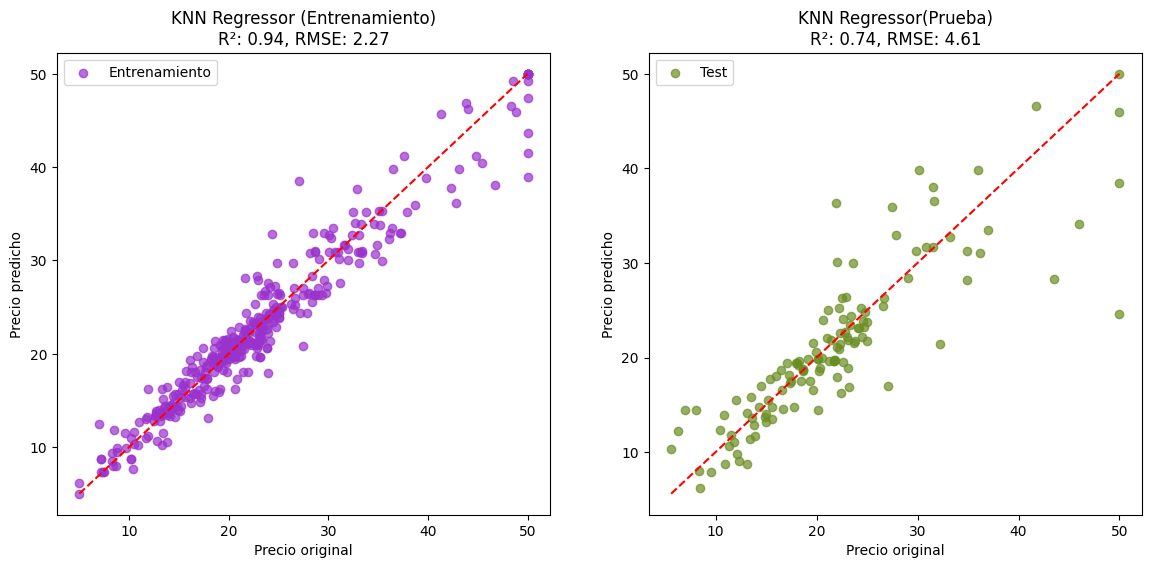

In [66]:
# Predicciones

y_train_pred_knn = grid_knr.predict(X_train)
y_test_pred_knn = grid_knr.predict(X_test)

# Métricas

r2_train_knn = r2_score(y_train, y_train_pred_knn)
r2_test_knn = r2_score(y_test, y_test_pred_knn)

rmse_train_knn = np.sqrt(mean_squared_error(y_train, y_train_pred_knn))
rmse_test_knn = np.sqrt(mean_squared_error(y_test, y_test_pred_knn))

# Gráfico

plt.figure(figsize=(14, 6))

# Conjunto de entrenamiento
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred_knn, label = "Entrenamiento", c = '#9A32CD', alpha = 0.7)
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], '--', color = "red")
plt.xlabel("Precio original")
plt.ylabel("Precio predicho")
plt.title(f"KNN Regressor (Entrenamiento)\nR²: {r2_train_knn:.2f}, RMSE: {rmse_train_knn:.2f}")
plt.legend()

# Conjunto de prueba
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred_knn, label = "Test",c = '#6B8E23', alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color = "red")
plt.xlabel("Precio original")
plt.ylabel("Precio predicho")
plt.title(f"KNN Regressor(Prueba)\nR²: {r2_test_knn:.2f}, RMSE: {rmse_test_knn:.2f}")
plt.legend()

plt.show()

Las gráficas muestran los resultados del modelo KNN Regressor en los conjuntos de entrenamiento y prueba. En el conjunto de entrenamiento, el modelo presenta un alto desempeño con un $R^2$ de $0.94$ y un RMSE de $2.27$, lo que indica que ajusta bien los datos de entrenamiento. Sin embargo, en el conjunto de prueba, el $R^2$ baja a $0.74$ y el RMSE aumenta a $4.61$, lo que puede sugerir un sobreajuste. La línea roja indica la predicción perfecta, y se puede observar que las predicciones en el conjunto de prueba están más dispersas en comparación con las del entrenamiento.

#### **Gráfica de resultados para Regresión lineal**

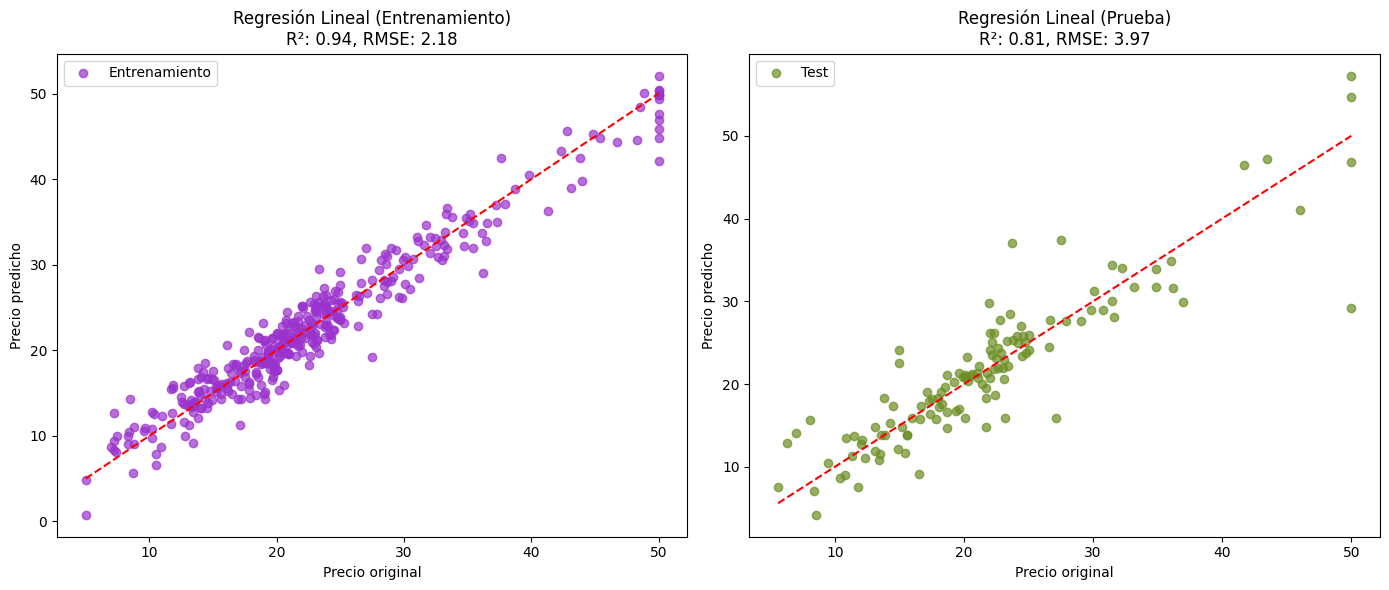

In [67]:
grid_lr.fit(X_train, y_train)
y_train_pred_lr = grid_lr.predict(X_train)
y_test_pred_lr = grid_lr.predict(X_test)

# Métricas
r2_train_lr = r2_score(y_train, y_train_pred_lr)
r2_test_lr = r2_score(y_test, y_test_pred_lr)
rmse_train_lr = np.sqrt(mean_squared_error(y_train, y_train_pred_lr))
rmse_test_lr = np.sqrt(mean_squared_error(y_test, y_test_pred_lr))

plt.figure(figsize=(14, 6))

# Conjunto de entrenamiento
plt.subplot(1, 2, 1) 
plt.scatter(y_train, y_train_pred_lr, label = "Entrenamiento", c = '#9A32CD', alpha = 0.7)
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], '--', color = 'red')
plt.xlabel("Precio original")
plt.ylabel("Precio predicho")
plt.title(f"Regresión Lineal (Entrenamiento)\nR²: {r2_train_lr:.2f}, RMSE: {rmse_train_lr:.2f}")
plt.legend()

# Conjunto de test
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred_lr, label = "Test",c = '#6B8E23', alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color = 'red')
plt.xlabel("Precio original")
plt.ylabel("Precio predicho")
plt.title(f"Regresión Lineal (Prueba)\nR²: {r2_test_lr:.2f}, RMSE: {rmse_test_lr:.2f}")
plt.legend()

plt.tight_layout()
plt.show()




Las gráficas muestran el rendimiento del modelo de regresión lineal en los conjuntos de entrenamiento y prueba. En el conjunto de entrenamiento, el modelo tiene un $R^2$ de $0.94$ y un RMSE de $2.18$, lo que indica un buen ajuste en los datos de entrenamiento. En el conjunto de prueba , el $R^2$ baja a $0.81$ y el RMSE aumenta a $3.97$. Aunque disminuye el coeficiente de determinación, el modelo maneja una buena capacidad predictiva. Las predicciones en ambas gráficas se ajustan bien a la línea roja, aunque las del conjunto de prueba muestran una mayor dispersión. En conclusión, el modelo de regrsión lineal se ajusta mejor a este conjunto de datos, en comparación al modelo `KNeighborsRegressor()`.